<a href="https://colab.research.google.com/github/YounkoA/Final_ComVis/blob/main/uji_paddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 8.7455 - accuracy: 0.7805 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch

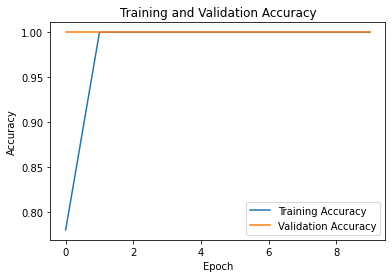

Text(0, 0.5, 'Loss')

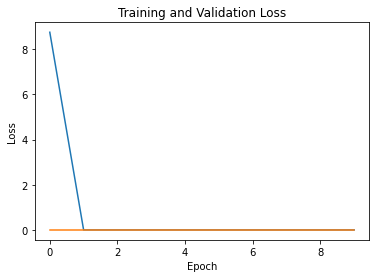

In [ ]:
# Import required libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Set the path for your dataset
path = '/content/drive/My Drive/Dataset_Padi/'

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the number of classes (in this case, 2 - high quality and lower quality)
num_classes = 2

# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define a function to load images and their corresponding labels
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=input_shape)
            img = img_to_array(img)
            images.append(img)
            if 'high' in filename:
                labels.append(1)
            else:
                labels.append(0)
    return images, labels

# Load the images and labels
images, labels = load_images(path)

# Convert the images and labels into numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert the labels into one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0 opencv-python-headless scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import f1_score


In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset_Padi'

img_width, img_height = 224, 224
num_classes = 2


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])


In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical')
val_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10


SyntaxError: ignored